In [1]:
import numpy as np
import pandas as pd

In [2]:
train=pd.read_csv('training_set_features.csv')
label=pd.read_csv('training_set_labels.csv')
train_f=pd.merge(label,train)
label
train
train_f
train_final=pd.read_csv('final_train.csv')

In [3]:
train_f.replace('',np.nan)

,respondent_id,h1n1_vaccine,seasonal_vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,0,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,0,0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,0,1,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,0,0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,0,0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,26703,0,0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,26704,0,1,2.0,2.0,0.0,1.0,1.0,1.0,1.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN
26705,26705,0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg


Text(0.5, 1.0, 'Total Missing Value (%)')

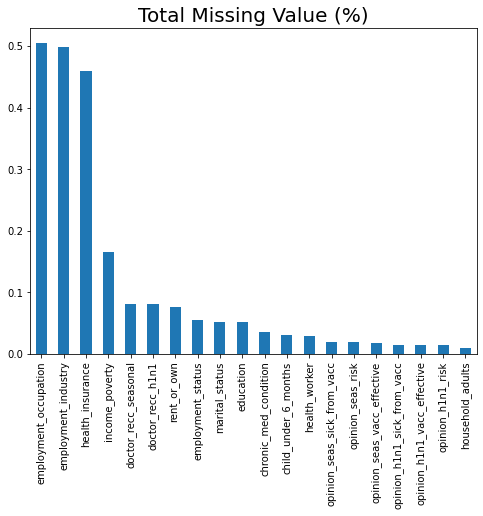

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
total=train.isnull().sum().sort_values(ascending=False)
percent=(train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
percent_data = percent.head(20)
percent_data.plot(kind="bar", figsize = (8,6), fontsize = 10)
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Total Missing Value (%)", fontsize = 20)

Text(0.5, 1.0, 'Correlation with Missing Values')

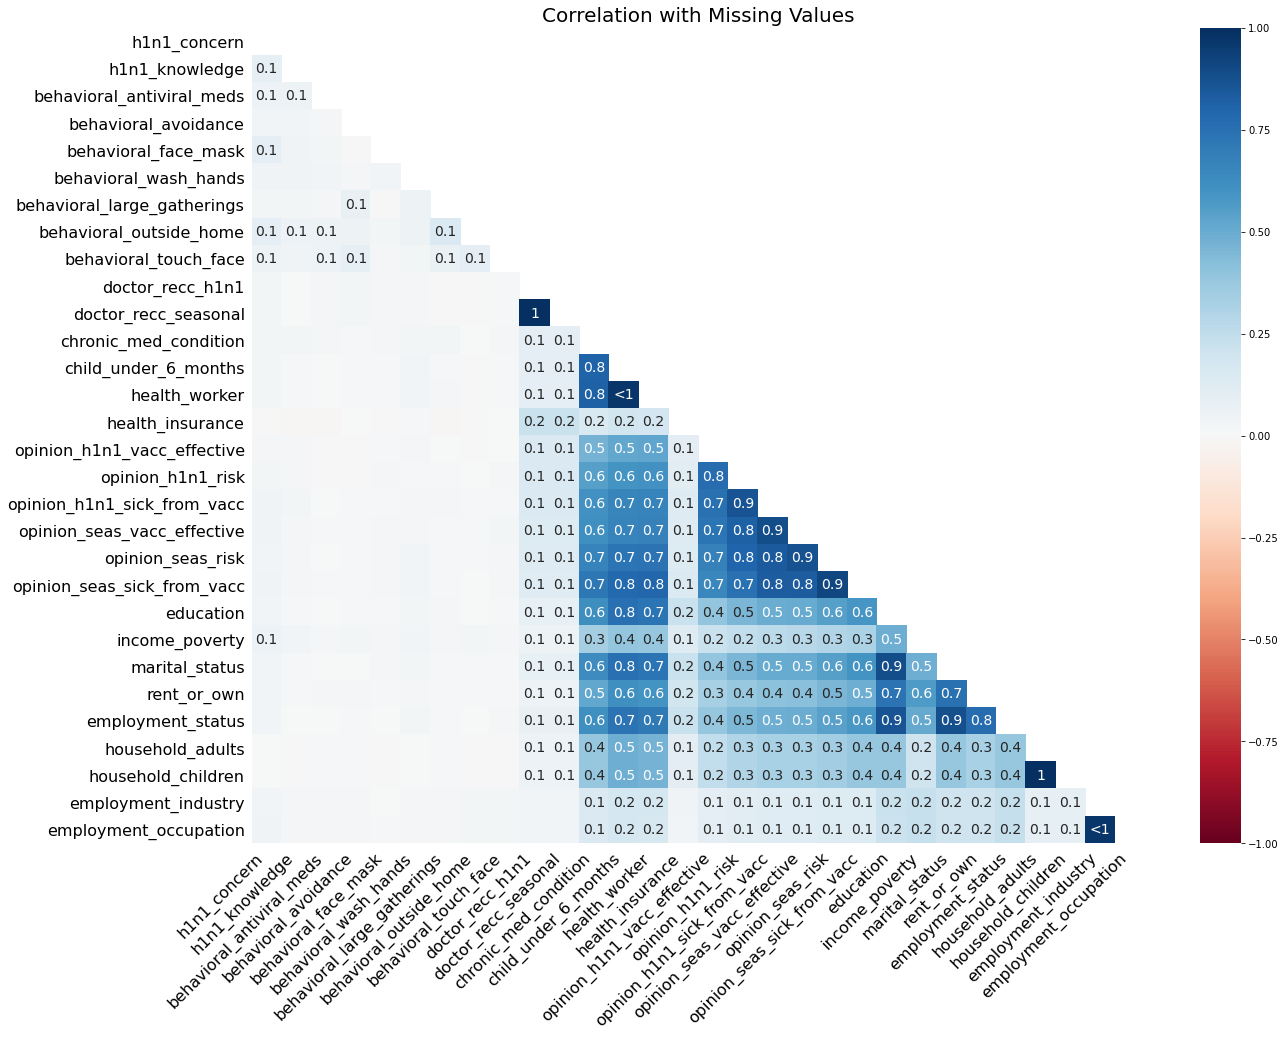

In [34]:
import missingno as msno
missingdata=train.columns[train.isnull().any()].tolist()
msno.heatmap(train[missingdata], figsize=(20,15))
plt.title("Correlation with Missing Values", fontsize = 20)

In [ ]:
msno.dendrogram(train) #계층분석

In [ ]:
train_f.corr()

In [30]:
train_f.isnull().sum()

respondent_id                      0
h1n1_vaccine                       0
seasonal_vaccine                   0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
s

In [ ]:
train_f.isnull().mean()

In [ ]:
from pyecharts.charts import Bar
from pyecharts import options as opts
bar=(
    Bar()
    .add_xaxis(["18-34","35-44","45-54","55-64","65+"])
    .add_yaxis("Female",[2808,2247,3148,3268,4387])
    .add_yaxis("Male",[2407,1601,2090,2295,2456])
    .set_global_opts(title_opts=opts.TitleOpts(title="Age & Sex"))
)

In [ ]:
bar.render_notebook()

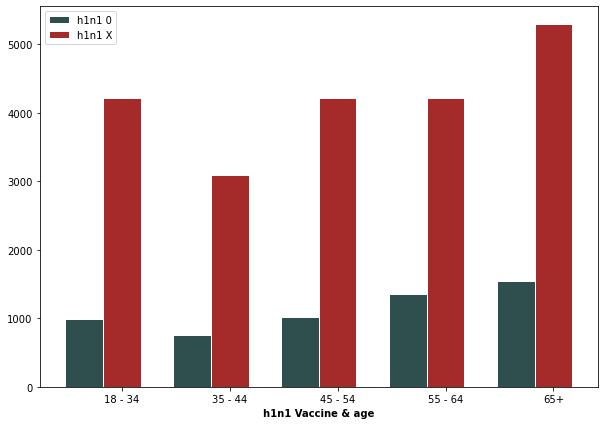

In [4]:
import matplotlib.pyplot as plt
one1834=train_f[train_f['age_group']=='18 - 34 Years']
one1834=one1834[one1834['h1n1_vaccine']==1]
one1834=one1834['h1n1_vaccine'].count()
##
one3544=train_f[train_f['age_group']=='35 - 44 Years']
one3544=one3544[one3544['h1n1_vaccine']==1]
one3544=one3544['h1n1_vaccine'].count()
##
one4554=train_f[train_f['age_group']=='45 - 54 Years']
one4554=one4554[one4554['h1n1_vaccine']==1]
one4554=one4554['h1n1_vaccine'].count()
##
one5564=train_f[train_f['age_group']=='55 - 64 Years']
one5564=one5564[one5564['h1n1_vaccine']==1]
one5564=one5564['h1n1_vaccine'].count()
##
one65=train_f[train_f['age_group']=='65+ Years']
one65=one65[one65['h1n1_vaccine']==1]
one65=one65['h1n1_vaccine'].count()

##
zero1834=train_f[train_f['age_group']=='18 - 34 Years']
zero1834=zero1834[zero1834['h1n1_vaccine']==0]
zero1834=zero1834['h1n1_vaccine'].count()
##
zero3544=train_f[train_f['age_group']=='35 - 44 Years']
zero3544=zero3544[zero3544['h1n1_vaccine']==0]
zero3544=zero3544['h1n1_vaccine'].count()
##
zero4554=train_f[train_f['age_group']=='45 - 54 Years']
zero4554=zero4554[zero4554['h1n1_vaccine']==0]
zero4554=zero4554['h1n1_vaccine'].count()
##
zero5564=train_f[train_f['age_group']=='55 - 64 Years']
zero5564=zero5564[zero5564['h1n1_vaccine']==0]
zero5564=zero5564['h1n1_vaccine'].count()
##
zero65=train_f[train_f['age_group']=='65+ Years']
zero65=zero65[zero65['h1n1_vaccine']==0]
zero65=zero65['h1n1_vaccine'].count()

##########################################
h1n1one=[one1834,one3544,one4554,one5564,one65]
h1n1zero=[zero1834,zero3544,zero4554,zero5564,zero65]
barWidth=0.35
r1=np.arange(len(h1n1one))
r2=[x+barWidth for x in r1]
fig,axs=plt.subplots(figsize=(10,7))
plt.bar(r1, h1n1one, color='darkslategray', width=barWidth, edgecolor='white', label='h1n1 0')
plt.bar(r2, h1n1zero, color='brown', width=barWidth, edgecolor='white', label='h1n1 X')
plt.xlabel('h1n1 Vaccine & age', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(h1n1one))], ['18 - 34', '35 - 44', '45 - 54', '55 - 64', '65+'])
plt.legend()


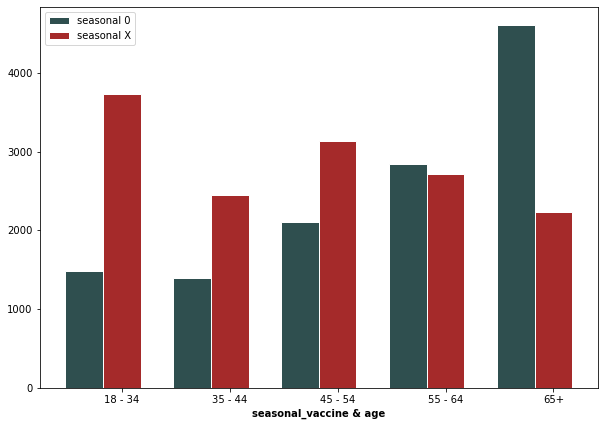

In [7]:
one1834=train_f[train_f['age_group']=='18 - 34 Years']
one1834=one1834[one1834['seasonal_vaccine']==1]
one1834=one1834['seasonal_vaccine'].count()
##
one3544=train_f[train_f['age_group']=='35 - 44 Years']
one3544=one3544[one3544['seasonal_vaccine']==1]
one3544=one3544['seasonal_vaccine'].count()
##
one4554=train_f[train_f['age_group']=='45 - 54 Years']
one4554=one4554[one4554['seasonal_vaccine']==1]
one4554=one4554['seasonal_vaccine'].count()
##
one5564=train_f[train_f['age_group']=='55 - 64 Years']
one5564=one5564[one5564['seasonal_vaccine']==1]
one5564=one5564['seasonal_vaccine'].count()
##
one65=train_f[train_f['age_group']=='65+ Years']
one65=one65[one65['seasonal_vaccine']==1]
one65=one65['seasonal_vaccine'].count()

##
zero1834=train_f[train_f['age_group']=='18 - 34 Years']
zero1834=zero1834[zero1834['seasonal_vaccine']==0]
zero1834=zero1834['seasonal_vaccine'].count()
##
zero3544=train_f[train_f['age_group']=='35 - 44 Years']
zero3544=zero3544[zero3544['seasonal_vaccine']==0]
zero3544=zero3544['seasonal_vaccine'].count()
##
zero4554=train_f[train_f['age_group']=='45 - 54 Years']
zero4554=zero4554[zero4554['seasonal_vaccine']==0]
zero4554=zero4554['seasonal_vaccine'].count()
##
zero5564=train_f[train_f['age_group']=='55 - 64 Years']
zero5564=zero5564[zero5564['seasonal_vaccine']==0]
zero5564=zero5564['seasonal_vaccine'].count()
##
zero65=train_f[train_f['age_group']=='65+ Years']
zero65=zero65[zero65['seasonal_vaccine']==0]
zero65=zero65['seasonal_vaccine'].count()

##########################################
h1n1one=[one1834,one3544,one4554,one5564,one65]
h1n1zero=[zero1834,zero3544,zero4554,zero5564,zero65]
barWidth=0.35
r1=np.arange(len(h1n1one))
r2=[x+barWidth for x in r1]
fig,axs=plt.subplots(figsize=(10,7))
plt.bar(r1, h1n1one, color='darkslategray', width=barWidth, edgecolor='white', label='seasonal 0')
plt.bar(r2, h1n1zero, color='brown', width=barWidth, edgecolor='white', label='seasonal X')
plt.xlabel('seasonal_vaccine & age', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(h1n1one))], ['18 - 34', '35 - 44', '45 - 54', '55 - 64', '65+'])
plt.legend()

Text(0.5, 1.0, 'H1n1 vaccine O')

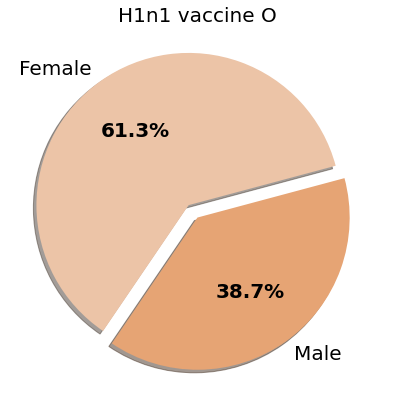

In [22]:
fig,axs=plt.subplots(figsize=(7,7))
h1n1F1=train_f[train_f['sex']=='Female']
h1n1F1=h1n1F1[h1n1F1['h1n1_vaccine']==1]
h1n1F1=h1n1F1['h1n1_vaccine'].count()
#
h1n1M1=train_f[train_f['sex']=='Male']
h1n1M1=h1n1M1[h1n1M1['h1n1_vaccine']==1]
h1n1M1=h1n1M1['h1n1_vaccine'].count()
#
h1n1F0=train_f[train_f['sex']=='Female']
h1n1F0=h1n1F0[h1n1F0['h1n1_vaccine']==0]
h1n1F0=h1n1F0['h1n1_vaccine'].count()
#
h1n1M0=train_f[train_f['sex']=='Male']
h1n1M0=h1n1M0[h1n1M0['h1n1_vaccine']==0]
h1n1M0=h1n1M0['h1n1_vaccine'].count()
##
SSF1=train_f[train_f['sex']=='Female']
SSF1=SSF1[SSF1['seasonal_vaccine']==1]
SSF1=SSF1['seasonal_vaccine'].count()
#
SSM1=train_f[train_f['sex']=='Male']
SSM1=SSM1[SSM1['seasonal_vaccine']==1]
SSM1=SSM1['seasonal_vaccine'].count()
#
SSF0=train_f[train_f['sex']=='Female']
SSF0=SSF0[SSF0['seasonal_vaccine']==0]
SSF0=SSF0['seasonal_vaccine'].count()
#
SSM0=train_f[train_f['sex']=='Male']
SSM0=SSM0[SSM0['seasonal_vaccine']==0]
SSM0=SSM0['seasonal_vaccine'].count()
##
ratio1=[h1n1F1,h1n1M1]
labels1=['Female','Male']
patches,texts,pcts=plt.pie(x=ratio1,labels=labels1,autopct='%.1f%%',shadow=True,startangle=15,colors=(['#ecc4a7','#e6a474']), explode=([0.1,0]),textprops={'fontsize': 20})
plt.setp(pcts,color='black',fontweight='bold')
plt.title('H1n1 vaccine O',fontsize=20)

Text(0.5, 1.0, 'H1n1 vaccine X')

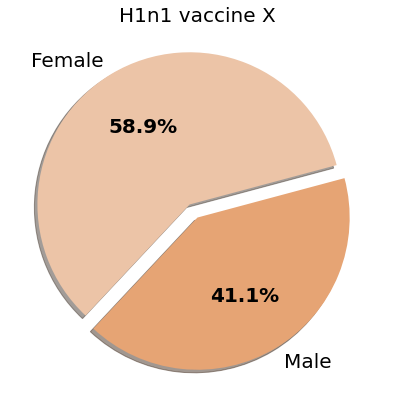

In [25]:
#
fig,axs=plt.subplots(figsize=(7,7))
ratio2=[h1n1F0,h1n1M0]
labels2=['Female','Male']
patches,texts,pcts=plt.pie(x=ratio2,labels=labels2,autopct='%.1f%%',shadow=True,startangle=15,colors=(['#ecc4a7','#e6a474']), explode=([0.1,0]),textprops={'fontsize': 20})
plt.setp(pcts,color='black',fontweight='bold')
plt.title('H1n1 vaccine X',fontsize=20)

Text(0.5, 1.0, 'Seasonal vaccine O')

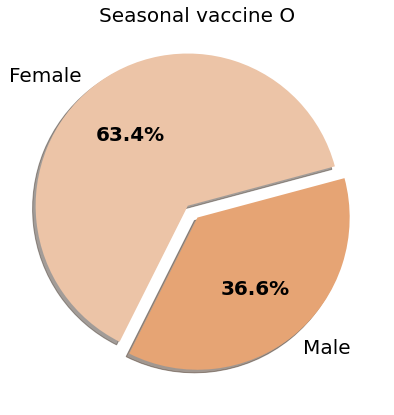

In [26]:
#
fig,axs=plt.subplots(figsize=(7,7))
ratio3=[SSF1,SSM1]
labels3=['Female','Male']
patches,texts,pcts=plt.pie(x=ratio3,labels=labels3,autopct='%.1f%%',shadow=True,startangle=15,colors=(['#ecc4a7','#e6a474']), explode=([0.1,0]),textprops={'fontsize': 20})
plt.setp(pcts,color='black',fontweight='bold')
plt.title('Seasonal vaccine O',fontsize=20)

Text(0.5, 1.0, 'Seasonal vaccine X')

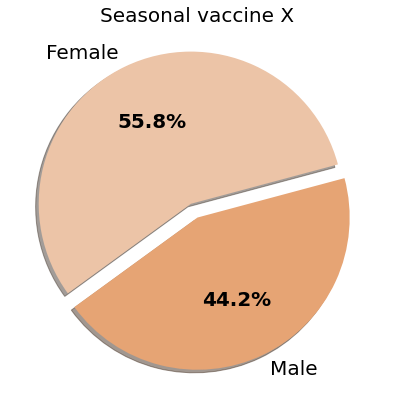

In [29]:
#
fig,axs=plt.subplots(figsize=(7,7))
ratio4=[SSF0,SSM0]
labels4=['Female','Male']
patches,texts,pcts=plt.pie(x=ratio4,labels=labels4,autopct='%.1f%%',shadow=True,startangle=15,colors=(['#ecc4a7','#e6a474']), explode=([0.1,0]),textprops={'fontsize': 20})
plt.setp(pcts,color='black',fontweight='bold')
plt.title('Seasonal vaccine X',fontsize=20)

[None, None, None, None, None, None, None, None, None, None]

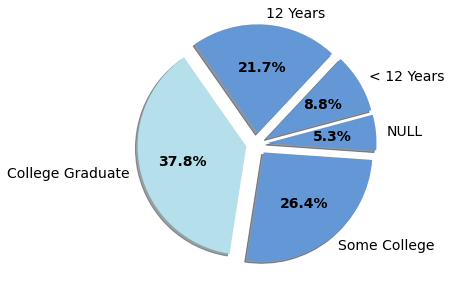

In [35]:
import matplotlib.pyplot as plt
fig,axs=plt.subplots(figsize=(5,5))
under12=train_f[train_f['education']=='< 12 Years']
under12=under12['education'].count()
twelve_years=train_f[train_f['education']=='12 Years']
twelve_years=twelve_years['education'].count()
College_Graduate=train_f[train_f['education']=='College Graduate']
College_Graduate=College_Graduate['education'].count()
Some_College=train_f[train_f['education']=='Some College']
Some_College=Some_College['education'].count()
none=train_f['education'].isna().sum()
ratio=[under12,twelve_years,College_Graduate,Some_College,none]
labels=['< 12 Years','12 Years','College Graduate','Some College','NULL']
patches,texts,pcts=plt.pie(x=ratio,labels=labels,autopct='%.1f%%',shadow=True,startangle=15,colors=(['#6397d6','#6397d6','#b4dfeb','#6397d6','#6397d6']), explode=([0.1,0.1,0.1,0.1,0.1]),textprops={'fontsize': 14})
plt.setp(pcts,color='black',fontweight='bold')

[None, None, None, None, None, None, None, None]

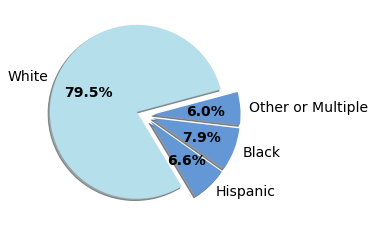

In [4]:
fig,axs=plt.subplots(figsize=(4,4))
white=train_f[train_f['race']=='White']
white=white['race'].count()
hispanic=train_f[train_f['race']=='Hispanic']
hispanic=hispanic['race'].count()
black=train_f[train_f['race']=='Black']
black=black['race'].count()
other=train_f[train_f['race']=='Other or Multiple']
other=other['race'].count()
ratio=[white,hispanic,black,other]
labels=['White','Hispanic','Black','Other or Multiple']
patches,texts,pcts=plt.pie(x=ratio,labels=labels,autopct='%.1f%%',shadow=True,startangle=15,colors=(['#b4dfeb','#6397d6','#6397d6','#6397d6']), explode=([0.1,0.1,0.1,0.1]),textprops={'fontsize': 14})
plt.setp(pcts,color='black',fontweight='bold')

[None, None, None, None, None, None, None, None, None, None]

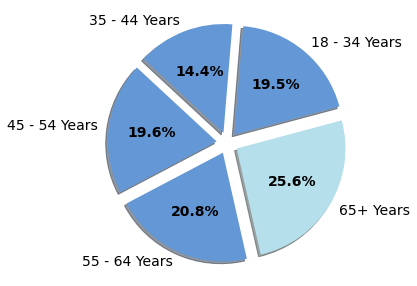

In [64]:
fig,axs=plt.subplots(figsize=(5,5))
one1834=train_f[train_f['age_group']=='18 - 34 Years']
one1834=one1834['age_group'].count()
##
one3544=train_f[train_f['age_group']=='35 - 44 Years']
one3544=one3544['age_group'].count()
##
one4554=train_f[train_f['age_group']=='45 - 54 Years']
one4554=one4554['age_group'].count()
##
one5564=train_f[train_f['age_group']=='55 - 64 Years']
one5564=one5564['age_group'].count()
##
one65=train_f[train_f['age_group']=='65+ Years']
one65=one65['age_group'].count()
##
ratio=[one1834,one3544,one4554,one5564,one65]
labels=['18 - 34 Years','35 - 44 Years','45 - 54 Years','55 - 64 Years','65+ Years']
patches,texts,pcts=plt.pie(x=ratio,labels=labels,autopct='%.1f%%',shadow=True,startangle=15,colors=(['#6397d6','#6397d6','#6397d6','#6397d6','#b4dfeb']), explode=([0.1,0.1,0.1,0.1,0.1]),textprops={'fontsize': 14})
plt.setp(pcts,color='black',fontweight='bold')

[None, None, None, None]

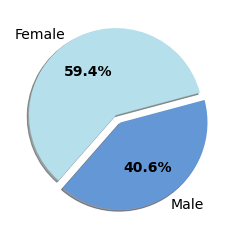

In [65]:
fig,axs=plt.subplots(figsize=(4,4))
Female=train_f[train_f['sex']=='Female']
Female=Female['sex'].count()
Male=train_f[train_f['sex']=='Male']
Male=Male['sex'].count()
ratio=[Female,Male]
labels=['Female','Male']
patches,texts,pcts=plt.pie(x=ratio,labels=labels,autopct='%.1f%%',shadow=True,startangle=15,colors=(['#b4dfeb','#6397d6']), explode=([0,0.1]),textprops={'fontsize': 14})
plt.setp(pcts,color='black',fontweight='bold')

[None, None, None, None, None, None]

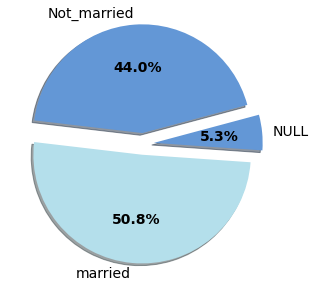

In [68]:
fig,axs=plt.subplots(figsize=(5,5))
Not_married=train_f[train_f['marital_status']=='Not Married']
Not_married=Not_married['marital_status'].count()
married=train_f[train_f['marital_status']=='Married']
married=married['marital_status'].count()
none=train_f['marital_status'].isna().sum()
ratio=[Not_married,married,none]
labels=['Not_married','married','NULL']
patches,texts,pcts=plt.pie(x=ratio,labels=labels,autopct='%.1f%%',shadow=True,startangle=15,colors=(['#6397d6','#b4dfeb','#6397d6']), explode=([0.1,0.1,0.1]),textprops={'fontsize': 14})
plt.setp(pcts,color='black',fontweight='bold')

[None, None, None, None, None, None]

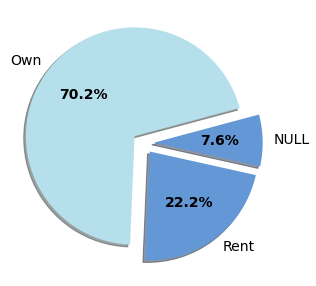

In [71]:
fig,axs=plt.subplots(figsize=(5,5))
Own=train_f[train_f['rent_or_own']=='Own']
Own=Own['rent_or_own'].count()
Rent=train_f[train_f['rent_or_own']=='Rent']
Rent=Rent['rent_or_own'].count()
none=train_f['rent_or_own'].isna().sum()
ratio=[Own,Rent,none]
labels=['Own','Rent','NULL']
patches,texts,pcts=plt.pie(x=ratio,labels=labels,autopct='%.1f%%',shadow=True,startangle=15,colors=(['#b4dfeb','#6397d6','#6397d6']), explode=([0.1,0.1,0.1]),textprops={'fontsize': 14})
plt.setp(pcts,color='black',fontweight='bold')

[None, None, None, None, None, None, None, None]

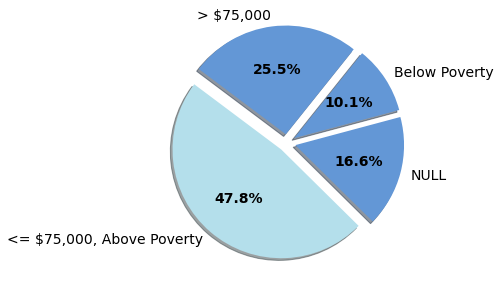

In [67]:
fig,axs=plt.subplots(figsize=(5,5))
below_poverty=train_f[train_f['income_poverty']=='Below Poverty']
below_poverty=below_poverty['income_poverty'].count()
##
above75=train_f[train_f['income_poverty']=='> $75,000']
above75=above75['income_poverty'].count()
##
aboveabove75=train_f[train_f['income_poverty']=='<= $75,000, Above Poverty']
aboveabove75=aboveabove75['income_poverty'].count()
##
none=train_f['income_poverty'].isna().sum()
ratio=[below_poverty,above75,aboveabove75,none]
labels=['Below Poverty','> $75,000','<= $75,000, Above Poverty','NULL']
patches,texts,pcts=plt.pie(x=ratio,labels=labels,autopct='%.1f%%',shadow=True,startangle=15,colors=(['#6397d6','#6397d6','#b4dfeb','#6397d6']), explode=([0.08,0.08,0.08,0.08]),textprops={'fontsize': 14})
plt.setp(pcts,color='black',fontweight='bold')


[None, None, None, None, None, None, None, None]

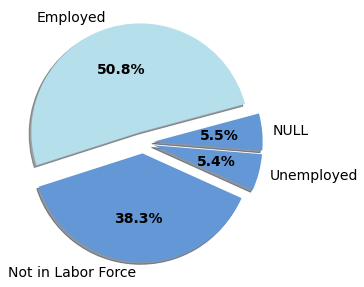

In [73]:
fig,axs=plt.subplots(figsize=(5,5))
employed=train_f[train_f['employment_status']=='Employed']
employed=employed['employment_status'].count()
##
Not=train_f[train_f['employment_status']=='Not in Labor Force']
Not=Not['employment_status'].count()
##
Unemployed=train_f[train_f['employment_status']=='Unemployed']
Unemployed=Unemployed['employment_status'].count()
##
none=train_f['employment_status'].isna().sum()
ratio=[employed,Not,Unemployed,none]
labels=['Employed','Not in Labor Force','Unemployed','NULL']
patches,texts,pcts=plt.pie(x=ratio,labels=labels,autopct='%.1f%%',shadow=True,startangle=15,colors=(['#b4dfeb','#6397d6','#6397d6','#6397d6']), explode=([0.1,0.1,0.1,0.1]),textprops={'fontsize': 14})
plt.setp(pcts,color='black',fontweight='bold')

[None, None, None, None, None, None]

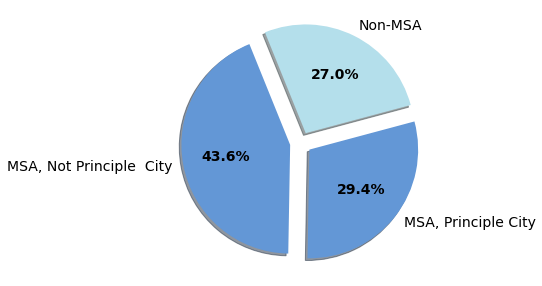

In [76]:
fig,axs=plt.subplots(figsize=(5,5))
Non_MSA=train_f[train_f['census_msa']=='Non-MSA']
Non_MSA=Non_MSA['census_msa'].count()
##
MSANPC=train_f[train_f['census_msa']=='MSA, Not Principle  City']
MSANPC=MSANPC['census_msa'].count()
##
MSAPC=train_f[train_f['census_msa']=='MSA, Principle City']
MSAPC=MSAPC['census_msa'].count()
##
ratio=[Non_MSA,MSANPC,MSAPC]
labels=['Non-MSA','MSA, Not Principle  City','MSA, Principle City']
patches,texts,pcts=plt.pie(x=ratio,labels=labels,autopct='%.1f%%',shadow=True,startangle=15,colors=(['#b4dfeb','#6397d6','#6397d6']), explode=([0.1,0.1,0.1]),textprops={'fontsize': 14})
plt.setp(pcts,color='black',fontweight='bold')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

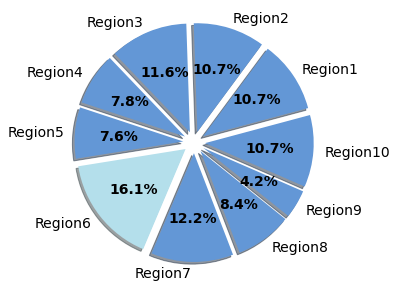

In [89]:
fig,axs=plt.subplots(figsize=(5,5))
Region1=train_final[train_final['hhs_geo_region']=='Region1']
Region1=Region1['hhs_geo_region'].count()
##
Region2=train_final[train_final['hhs_geo_region']=='Region2']
Region2=Region2['hhs_geo_region'].count()

Region3=train_final[train_final['hhs_geo_region']=='Region3']
Region3=Region3['hhs_geo_region'].count()

Region4=train_final[train_final['hhs_geo_region']=='Region4']
Region4=Region4['hhs_geo_region'].count()

Region5=train_final[train_final['hhs_geo_region']=='Region5']
Region5=Region5['hhs_geo_region'].count()

Region6=train_final[train_final['hhs_geo_region']=='Region6']
Region6=Region6['hhs_geo_region'].count()

Region7=train_final[train_final['hhs_geo_region']=='Region7']
Region7=Region7['hhs_geo_region'].count()

Region8=train_final[train_final['hhs_geo_region']=='Region8']
Region8=Region8['hhs_geo_region'].count()

Region9=train_final[train_final['hhs_geo_region']=='Region9']
Region9=Region9['hhs_geo_region'].count()

Region10=train_final[train_final['hhs_geo_region']=='Region10']
Region10=Region10['hhs_geo_region'].count()
##
ratio=[Region1,Region2,Region3,Region4,Region5,Region6,Region7,Region8,Region9,Region10]
labels=['Region1','Region2','Region3','Region4','Region5','Region6','Region7','Region8','Region9','Region10']
patches,texts,pcts=plt.pie(x=ratio,labels=labels,autopct='%.1f%%',shadow=True,startangle=15,colors=(['#6397d6','#6397d6','#6397d6','#6397d6','#6397d6','#b4dfeb','#6397d6','#6397d6','#6397d6','#6397d6']), explode=([0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]),textprops={'fontsize': 14})
plt.setp(pcts,color='black',fontweight='bold')

ValueError: not enough values to unpack (expected 3, got 2)

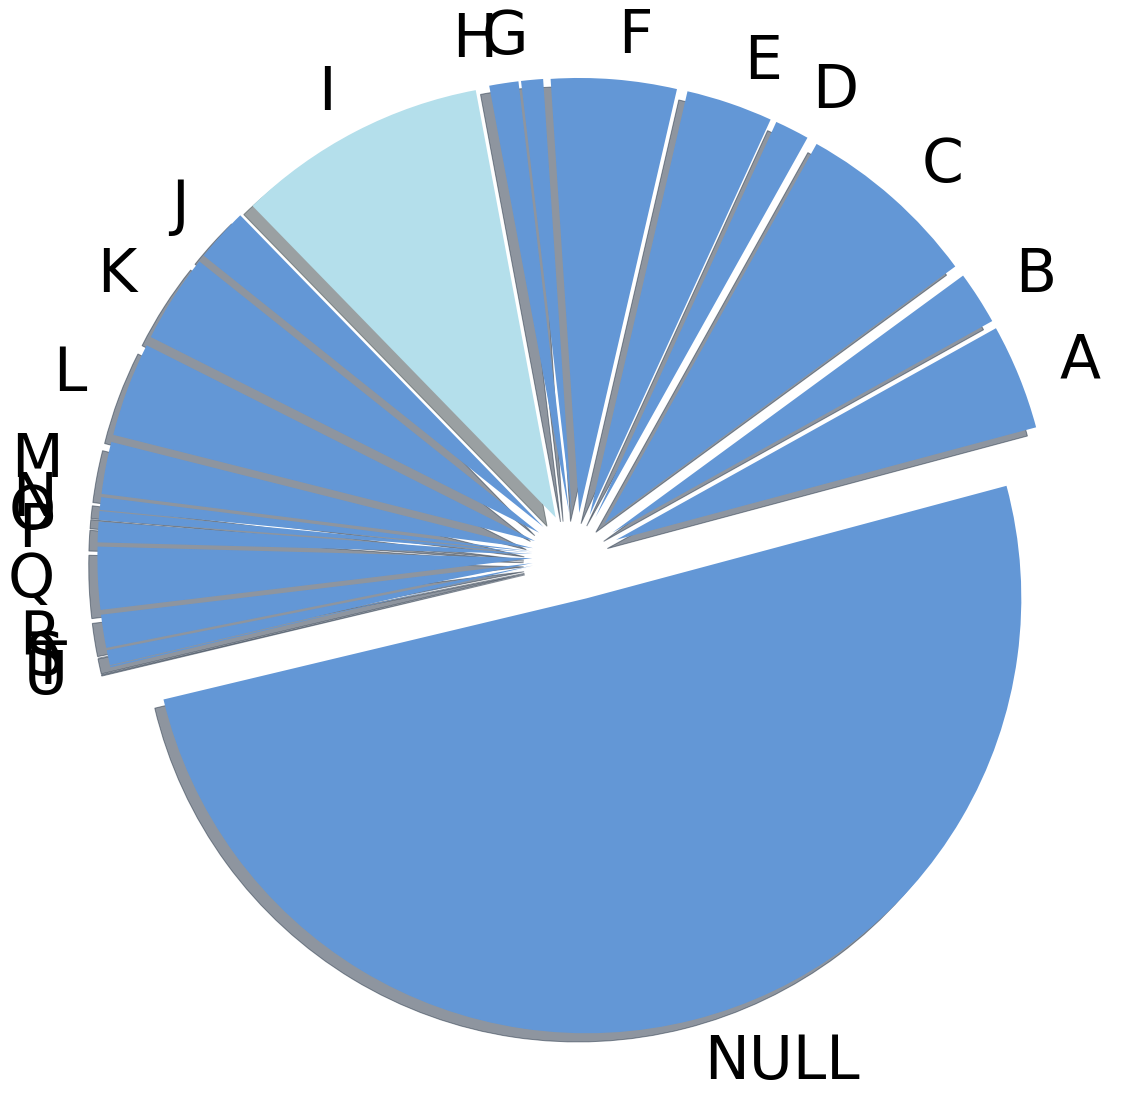

In [9]:
fig,axs=plt.subplots(figsize=(20,20))
A=train_final[train_final['employment_industry']=='A']
A=A['employment_industry'].count()

B=train_final[train_final['employment_industry']=='B']
B=B['employment_industry'].count()

C=train_final[train_final['employment_industry']=='C']
C=C['employment_industry'].count()

D=train_final[train_final['employment_industry']=='D']
D=D['employment_industry'].count()

E=train_final[train_final['employment_industry']=='E']
E=E['employment_industry'].count()

F=train_final[train_final['employment_industry']=='F']
F=F['employment_industry'].count()

G=train_final[train_final['employment_industry']=='G']
G=G['employment_industry'].count()

H=train_final[train_final['employment_industry']=='H']
H=H['employment_industry'].count()

I=train_final[train_final['employment_industry']=='I']
I=I['employment_industry'].count()

J=train_final[train_final['employment_industry']=='J']
J=J['employment_industry'].count()

K=train_final[train_final['employment_industry']=='K']
K=K['employment_industry'].count()

L=train_final[train_final['employment_industry']=='L']
L=L['employment_industry'].count()

M=train_final[train_final['employment_industry']=='M']
M=M['employment_industry'].count()

N=train_final[train_final['employment_industry']=='N']
N=N['employment_industry'].count()

O=train_final[train_final['employment_industry']=='O']
O=O['employment_industry'].count()

P=train_final[train_final['employment_industry']=='P']
P=P['employment_industry'].count()

Q=train_final[train_final['employment_industry']=='Q']
Q=Q['employment_industry'].count()

R=train_final[train_final['employment_industry']=='R']
R=R['employment_industry'].count()

S=train_final[train_final['employment_industry']=='mcubkhph']
S=S['employment_industry'].count()

T=train_final[train_final['employment_industry']=='T']
T=T['employment_industry'].count()

U=train_final[train_final['employment_industry']=='U']
U=U['employment_industry'].count()

none=train_final[train_final['employment_industry']=='Non Response']
none=none['employment_industry'].count()

ratio=[A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,none]
labels=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','NULL']
patches,texts,pcts=plt.pie(x=ratio,labels=labels,shadow=True,startangle=15,colors=(['#6397d6','#6397d6','#6397d6','#6397d6','#6397d6','#6397d6','#6397d6','#6397d6','#b4dfeb','#6397d6','#6397d6','#6397d6','#6397d6','#6397d6','#6397d6','#6397d6','#6397d6','#6397d6','#6397d6','#6397d6','#6397d6','#6397d6']), explode=([0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]),textprops={'fontsize': 60})
plt.setp(pcts,color='black',fontweight='bold')

ValueError: not enough values to unpack (expected 3, got 2)

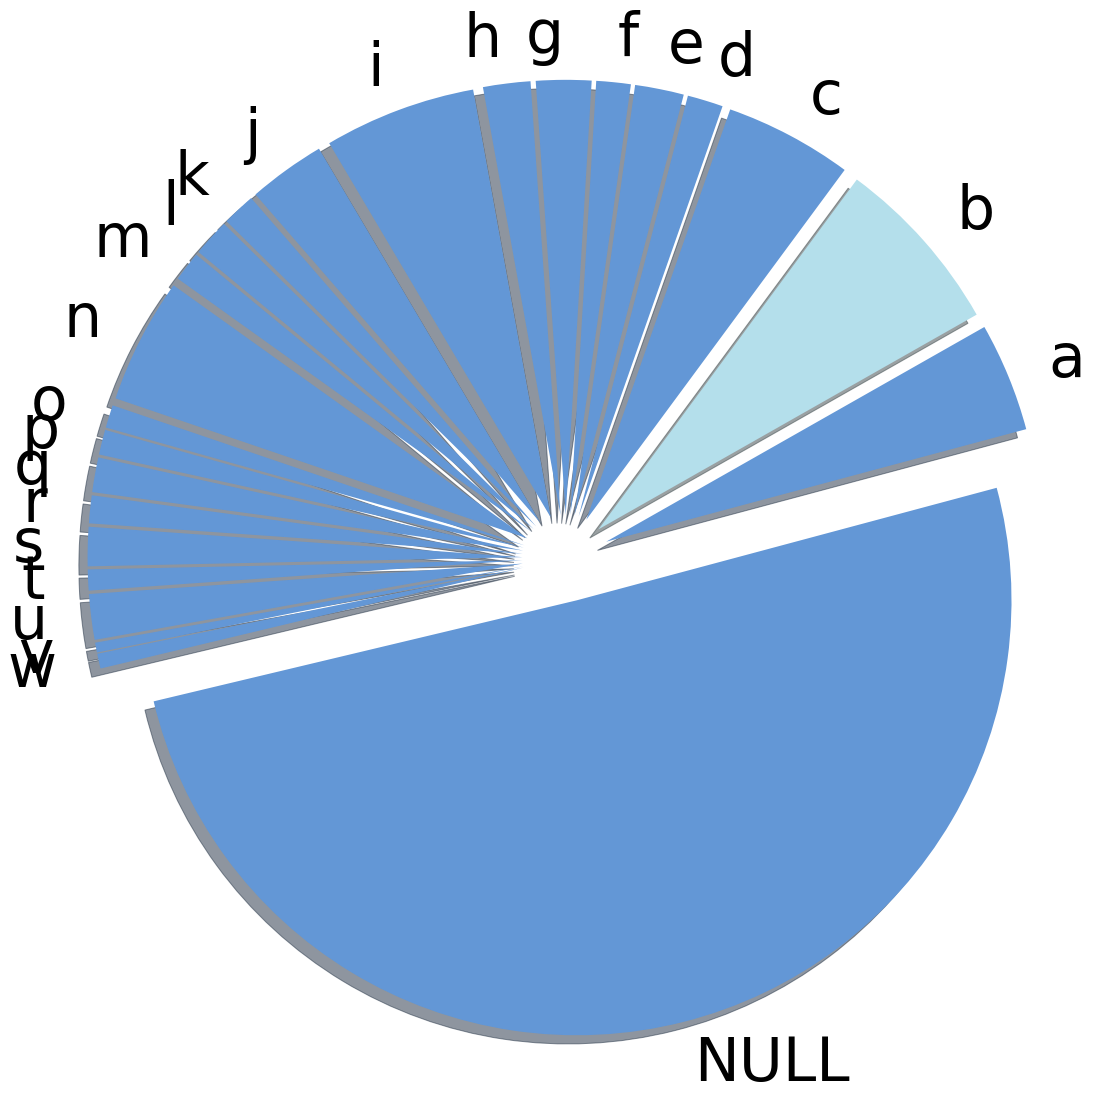

In [6]:
fig,axs=plt.subplots(figsize=(20,20))
a=train_final[train_final['employment_occupation']=='a']
a=a['employment_occupation'].count()

b=train_final[train_final['employment_occupation']=='b']
b=b['employment_occupation'].count()

c=train_final[train_final['employment_occupation']=='c']
c=c['employment_occupation'].count()

d=train_final[train_final['employment_occupation']=='d']
d=d['employment_occupation'].count()

e=train_final[train_final['employment_occupation']=='e']
e=e['employment_occupation'].count()

f=train_final[train_final['employment_occupation']=='f']
f=f['employment_occupation'].count()

g=train_final[train_final['employment_occupation']=='g']
g=g['employment_occupation'].count()

h=train_final[train_final['employment_occupation']=='h']
h=h['employment_occupation'].count()

i=train_final[train_final['employment_occupation']=='i']
i=i['employment_occupation'].count()

j=train_final[train_final['employment_occupation']=='j']
j=j['employment_occupation'].count()

k=train_final[train_final['employment_occupation']=='k']
k=k['employment_occupation'].count()

l=train_final[train_final['employment_occupation']=='l']
l=l['employment_occupation'].count()

m=train_final[train_final['employment_occupation']=='m']
m=m['employment_occupation'].count()

n=train_final[train_final['employment_occupation']=='n']
n=n['employment_occupation'].count()

o=train_final[train_final['employment_occupation']=='o']
o=o['employment_occupation'].count()

p=train_final[train_final['employment_occupation']=='p']
p=p['employment_occupation'].count()

q=train_final[train_final['employment_occupation']=='q']
q=q['employment_occupation'].count()

r=train_final[train_final['employment_occupation']=='r']
r=r['employment_occupation'].count()

s=train_final[train_final['employment_occupation']=='s']
s=s['employment_occupation'].count()

t=train_final[train_final['employment_occupation']=='t']
t=t['employment_occupation'].count()

u=train_final[train_final['employment_occupation']=='u']
u=u['employment_occupation'].count()

v=train_final[train_final['employment_occupation']=='v']
v=v['employment_occupation'].count()

w=train_final[train_final['employment_occupation']=='w']
w=w['employment_occupation'].count()

none=train_final[train_final['employment_occupation']=='Non Response']
none=none['employment_occupation'].count()

ratio=[a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,none]
labels=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','NULL']
patches,texts,pcts=plt.pie(x=ratio,labels=labels,autopct='%.1f%%',shadow=True,startangle=15,colors=(['#6397d6','#b4dfeb','#6397d6','#6397d6','#6397d6','#6397d6','#6397d6','#6397d6','#6397d6','#6397d6','#6397d6','#6397d6','#6397d6','#6397d6','#6397d6','#6397d6','#6397d6','#6397d6','#6397d6','#6397d6','#6397d6','#6397d6','#6397d6','#6397d6']), explode=([0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]),textprops={'fontsize': 40})
plt.setp(pcts,color='black',fontweight='bold')

[None, None, None, None, None, None, None, None, None, None]

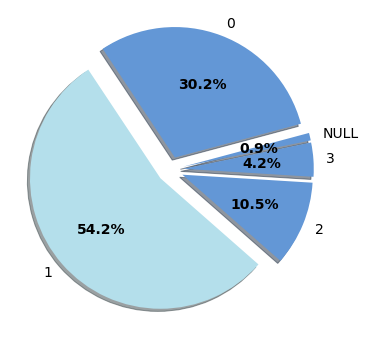

In [37]:
fig,axs=plt.subplots(figsize=(6,6))
zero=train_f[train_f['household_adults']==0]
zero=zero['household_adults'].count()
##
one=train_f[train_f['household_adults']==1]
one=one['household_adults'].count()
##
two=train_f[train_f['household_adults']==2]
two=two['household_adults'].count()
##
three=train_f[train_f['household_adults']==3]
three=three['household_adults'].count()
##
none=train_final[train_final['household_adults']=='Non Response']
none=none['household_adults'].count()
##
ratio=[zero,one,two,three,none]
labels=['0','1','2','3','NULL']
patches,texts,pcts=plt.pie(x=ratio,labels=labels,autopct='%.1f%%',shadow=True,startangle=15,colors=(['#6397d6','#b4dfeb','#6397d6','#6397d6','#6397d6']), explode=([0.1,0.1,0.1,0.1,0.1]),textprops={'fontsize': 14})
plt.setp(pcts,color='black',fontweight='bold')

[None, None, None, None, None, None, None, None, None, None]

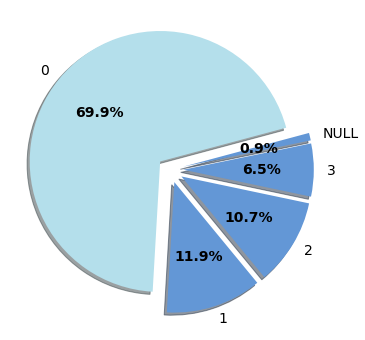

In [36]:
fig,axs=plt.subplots(figsize=(6,6))
zero=train_f[train_f['household_children']==0]
zero=zero['household_children'].count()
##
one=train_f[train_f['household_children']==1]
one=one['household_children'].count()
##
two=train_f[train_f['household_children']==2]
two=two['household_children'].count()
##
three=train_f[train_f['household_children']==3]
three=three['household_children'].count()
##
none=train_final[train_final['household_children']=='Non Response']
none=none['household_children'].count()
##
ratio=[zero,one,two,three,none]
labels=['0','1','2','3','NULL']
patches,texts,pcts=plt.pie(x=ratio,labels=labels,autopct='%.1f%%',shadow=True,startangle=15,colors=(['#b4dfeb','#6397d6','#6397d6','#6397d6','#6397d6']), explode=([0.1,0.1,0.1,0.1,0.1]),textprops={'fontsize': 14})
plt.setp(pcts,color='black',fontweight='bold')

[Text(0.5, 0, 'respondent_id'),
 Text(1.5, 0, 'h1n1_vaccine'),
 Text(2.5, 0, 'seasonal_vaccine'),
 Text(3.5, 0, 'h1n1_concern'),
 Text(4.5, 0, 'h1n1_knowledge'),
 Text(5.5, 0, 'behavioral_antiviral_meds'),
 Text(6.5, 0, 'behavioral_avoidance'),
 Text(7.5, 0, 'behavioral_face_mask'),
 Text(8.5, 0, 'behavioral_wash_hands'),
 Text(9.5, 0, 'behavioral_large_gatherings'),
 Text(10.5, 0, 'behavioral_outside_home'),
 Text(11.5, 0, 'behavioral_touch_face'),
 Text(12.5, 0, 'doctor_recc_h1n1'),
 Text(13.5, 0, 'doctor_recc_seasonal'),
 Text(14.5, 0, 'chronic_med_condition'),
 Text(15.5, 0, 'child_under_6_months'),
 Text(16.5, 0, 'health_worker'),
 Text(17.5, 0, 'health_insurance'),
 Text(18.5, 0, 'opinion_h1n1_vacc_effective'),
 Text(19.5, 0, 'opinion_h1n1_risk'),
 Text(20.5, 0, 'opinion_h1n1_sick_from_vacc'),
 Text(21.5, 0, 'opinion_seas_vacc_effective'),
 Text(22.5, 0, 'opinion_seas_risk'),
 Text(23.5, 0, 'opinion_seas_sick_from_vacc'),
 Text(24.5, 0, 'household_adults'),
 Text(25.5, 0, 'househ

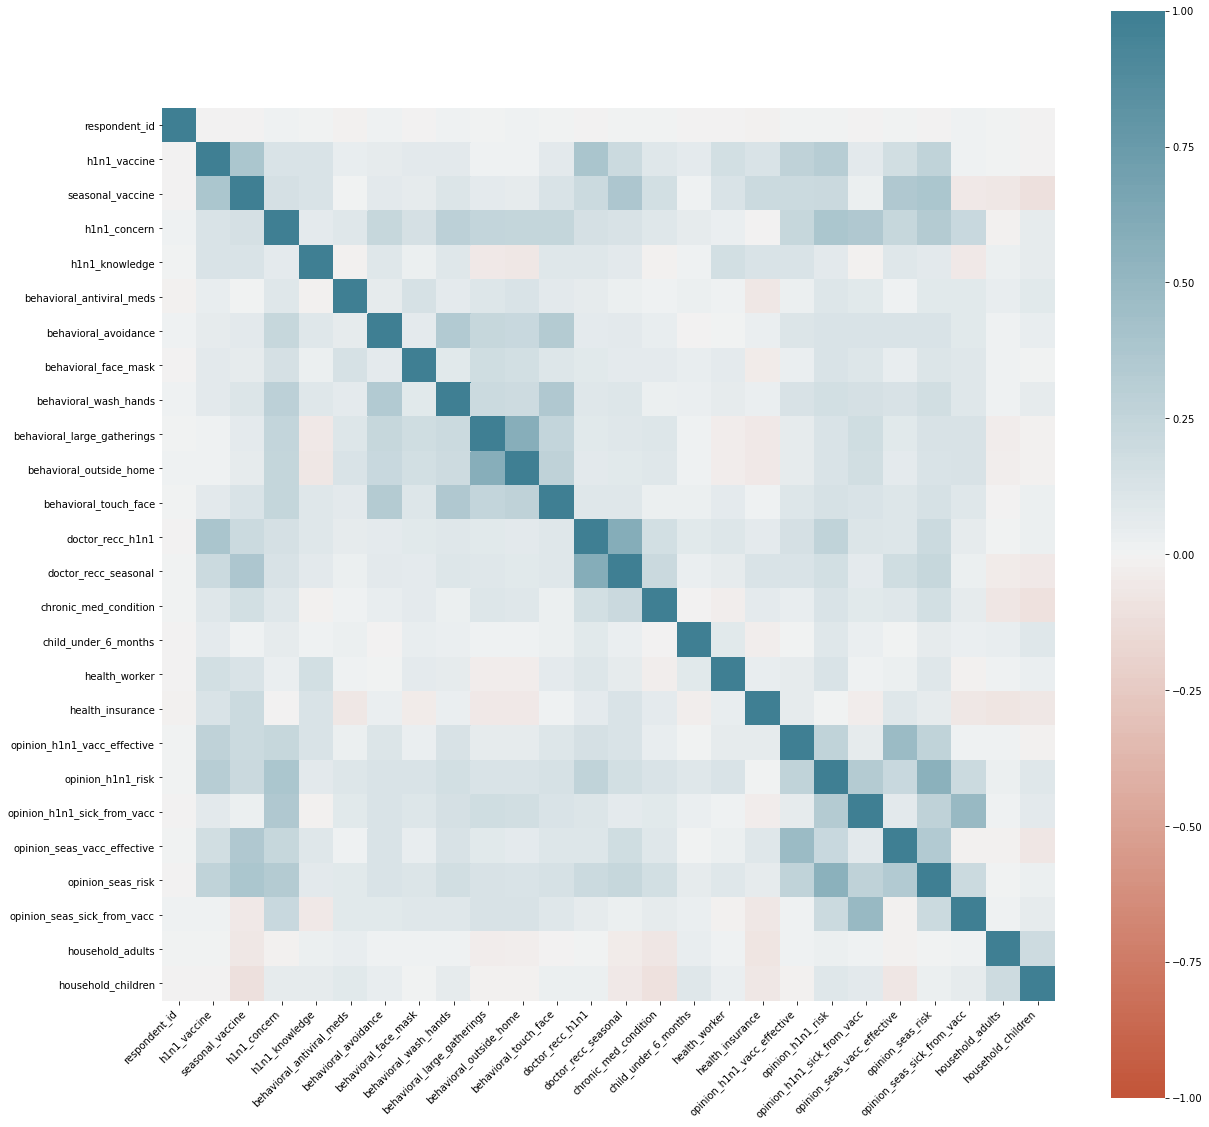

In [14]:
fig,axs=plt.subplots(figsize=(20,20))

corr=train_f.corr()
ax=sns.heatmap(
corr,
vmin=-1,vmax=1,center=0,
cmap=sns.diverging_palette(20,220,n=200),
square=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

[None, None, None, None, None, None, None, None, None, None, None, None]

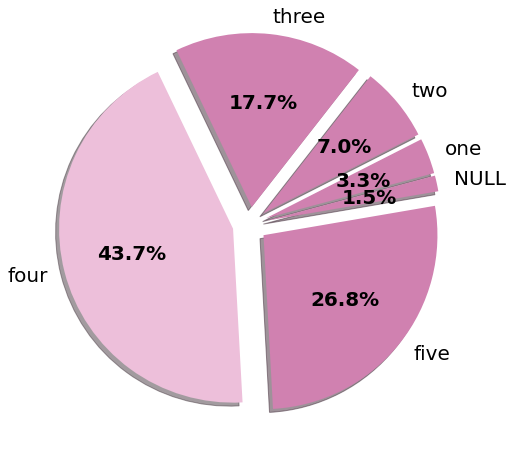

In [137]:
fig,axs=plt.subplots(figsize=(8,8))
one=train[train['opinion_h1n1_vacc_effective']==1]
one=one['opinion_h1n1_vacc_effective'].count()

two=train[train['opinion_h1n1_vacc_effective']==2]
two=two['opinion_h1n1_vacc_effective'].count()

three=train[train['opinion_h1n1_vacc_effective']==3]
three=three['opinion_h1n1_vacc_effective'].count()

four=train[train['opinion_h1n1_vacc_effective']==4]
four=four['opinion_h1n1_vacc_effective'].count()

five=train[train['opinion_h1n1_vacc_effective']==5]
five=five['opinion_h1n1_vacc_effective'].count()

none=train_final[train_final['opinion_h1n1_vacc_effective']=='Non Response']
none=none['opinion_h1n1_vacc_effective'].count()
##
ratio=[one,two,three,four,five,none]
labels=['one','two','three','four','five','NULL']
patches,texts,pcts=plt.pie(x=ratio,labels=labels,autopct='%.1f%%',shadow=True,startangle=15,colors=(['#d081b0','#d081b0','#d081b0','#edbfda','#d081b0','#d081b0']), explode=([0.1,0.1,0.1,0.1,0.1,0.1]),textprops={'fontsize': 20})
plt.setp(pcts,color='black',fontweight='bold')

[None, None, None, None, None, None, None, None, None, None, None, None]

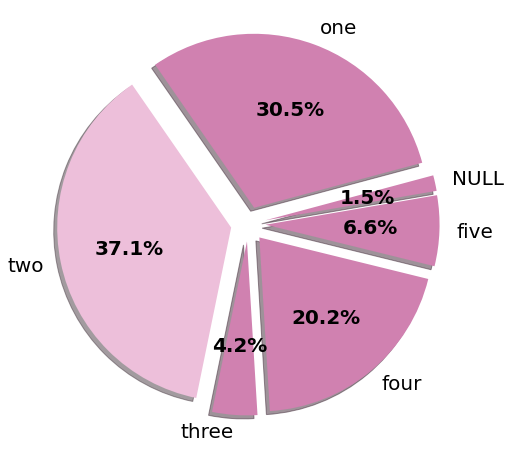

In [140]:
fig,axs=plt.subplots(figsize=(8,8))
one=train[train['opinion_h1n1_risk']==1]
one=one['opinion_h1n1_risk'].count()

two=train[train['opinion_h1n1_risk']==2]
two=two['opinion_h1n1_risk'].count()

three=train[train['opinion_h1n1_risk']==3]
three=three['opinion_h1n1_risk'].count()

four=train[train['opinion_h1n1_risk']==4]
four=four['opinion_h1n1_risk'].count()

five=train[train['opinion_h1n1_risk']==5]
five=five['opinion_h1n1_risk'].count()

none=train_final[train_final['opinion_h1n1_risk']=='Non Response']
none=none['opinion_h1n1_risk'].count()
##
ratio=[one,two,three,four,five,none]
labels=['one','two','three','four','five','NULL']
patches,texts,pcts=plt.pie(x=ratio,labels=labels,autopct='%.1f%%',shadow=True,startangle=15,colors=(['#d081b0','#edbfda','#d081b0','#d081b0','#d081b0','#d081b0']), explode=([0.1,0.1,0.1,0.1,0.1,0.1]),textprops={'fontsize': 20})
plt.setp(pcts,color='black',fontweight='bold')

[None, None, None, None, None, None, None, None, None, None, None, None]

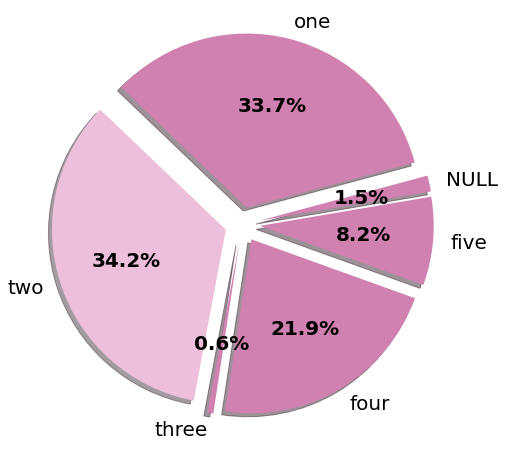

In [141]:
fig,axs=plt.subplots(figsize=(8,8))
one=train[train['opinion_h1n1_sick_from_vacc']==1]
one=one['opinion_h1n1_sick_from_vacc'].count()

two=train[train['opinion_h1n1_sick_from_vacc']==2]
two=two['opinion_h1n1_sick_from_vacc'].count()

three=train[train['opinion_h1n1_sick_from_vacc']==3]
three=three['opinion_h1n1_sick_from_vacc'].count()

four=train[train['opinion_h1n1_sick_from_vacc']==4]
four=four['opinion_h1n1_sick_from_vacc'].count()

five=train[train['opinion_h1n1_sick_from_vacc']==5]
five=five['opinion_h1n1_sick_from_vacc'].count()

none=train_final[train_final['opinion_h1n1_sick_from_vacc']=='Non Response']
none=none['opinion_h1n1_sick_from_vacc'].count()
##
ratio=[one,two,three,four,five,none]
labels=['one','two','three','four','five','NULL']
patches,texts,pcts=plt.pie(x=ratio,labels=labels,autopct='%.1f%%',shadow=True,startangle=15,colors=(['#d081b0','#edbfda','#d081b0','#d081b0','#d081b0','#d081b0']), explode=([0.1,0.1,0.1,0.1,0.1,0.1]),textprops={'fontsize': 20})
plt.setp(pcts,color='black',fontweight='bold')

[None, None, None, None, None, None, None, None, None, None, None, None]

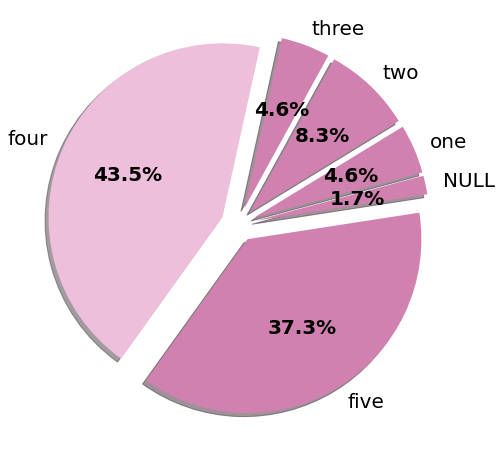

In [143]:
fig,axs=plt.subplots(figsize=(8,8))
one=train[train['opinion_seas_vacc_effective']==1]
one=one['opinion_seas_vacc_effective'].count()

two=train[train['opinion_seas_vacc_effective']==2]
two=two['opinion_seas_vacc_effective'].count()

three=train[train['opinion_seas_vacc_effective']==3]
three=three['opinion_seas_vacc_effective'].count()

four=train[train['opinion_seas_vacc_effective']==4]
four=four['opinion_seas_vacc_effective'].count()

five=train[train['opinion_seas_vacc_effective']==5]
five=five['opinion_seas_vacc_effective'].count()

none=train_final[train_final['opinion_seas_vacc_effective']=='Non Response']
none=none['opinion_seas_vacc_effective'].count()
##
ratio=[one,two,three,four,five,none]
labels=['one','two','three','four','five','NULL']
patches,texts,pcts=plt.pie(x=ratio,labels=labels,autopct='%.1f%%',shadow=True,startangle=15,colors=(['#d081b0','#d081b0','#d081b0','#edbfda','#d081b0','#d081b0']), explode=([0.1,0.1,0.1,0.1,0.1,0.1]),textprops={'fontsize': 20})
plt.setp(pcts,color='black',fontweight='bold')

[None, None, None, None, None, None, None, None, None, None, None, None]

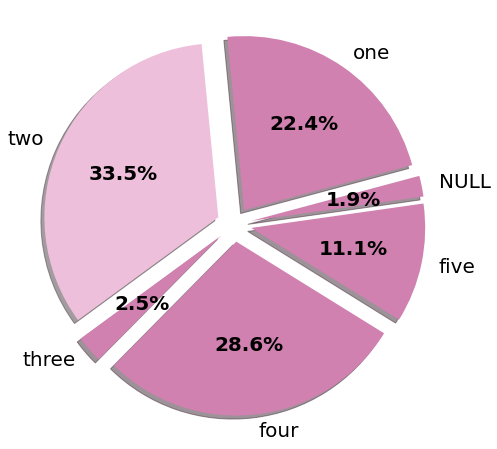

In [145]:
fig,axs=plt.subplots(figsize=(8,8))
one=train[train['opinion_seas_risk']==1]
one=one['opinion_seas_risk'].count()

two=train[train['opinion_seas_risk']==2]
two=two['opinion_seas_risk'].count()

three=train[train['opinion_seas_risk']==3]
three=three['opinion_seas_risk'].count()

four=train[train['opinion_seas_risk']==4]
four=four['opinion_seas_risk'].count()

five=train[train['opinion_seas_risk']==5]
five=five['opinion_seas_risk'].count()

none=train_final[train_final['opinion_seas_risk']=='Non Response']
none=none['opinion_seas_risk'].count()
##
ratio=[one,two,three,four,five,none]
labels=['one','two','three','four','five','NULL']
patches,texts,pcts=plt.pie(x=ratio,labels=labels,autopct='%.1f%%',shadow=True,startangle=15,colors=(['#d081b0','#edbfda','#d081b0','#d081b0','#d081b0','#d081b0']), explode=([0.1,0.1,0.1,0.1,0.1,0.1]),textprops={'fontsize': 20})
plt.setp(pcts,color='black',fontweight='bold')

[None, None, None, None, None, None, None, None, None, None, None, None]

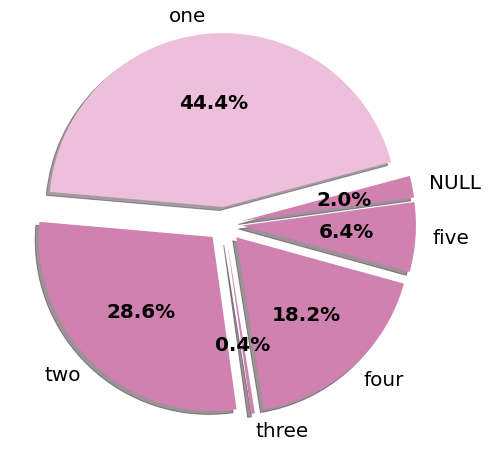

In [147]:
fig,axs=plt.subplots(figsize=(8,8))
one=train[train['opinion_seas_sick_from_vacc']==1]
one=one['opinion_seas_sick_from_vacc'].count()

two=train[train['opinion_seas_sick_from_vacc']==2]
two=two['opinion_seas_sick_from_vacc'].count()

three=train[train['opinion_seas_sick_from_vacc']==3]
three=three['opinion_seas_sick_from_vacc'].count()

four=train[train['opinion_seas_sick_from_vacc']==4]
four=four['opinion_seas_sick_from_vacc'].count()

five=train[train['opinion_seas_sick_from_vacc']==5]
five=five['opinion_seas_sick_from_vacc'].count()

none=train_final[train_final['opinion_seas_sick_from_vacc']=='Non Response']
none=none['opinion_seas_sick_from_vacc'].count()
##
ratio=[one,two,three,four,five,none]
labels=['one','two','three','four','five','NULL']
patches,texts,pcts=plt.pie(x=ratio,labels=labels,autopct='%.1f%%',shadow=True,startangle=15,colors=(['#edbfda','#d081b0','#d081b0','#d081b0','#d081b0','#d081b0']), explode=([0.1,0.1,0.1,0.1,0.1,0.1]),textprops={'fontsize': 20})
plt.setp(pcts,color='black',fontweight='bold')

[None, None, None, None, None, None]

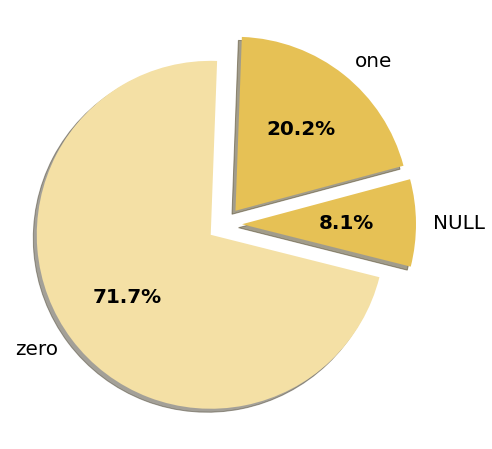

In [158]:
fig,axs=plt.subplots(figsize=(8,8))
one=train_f[train_f['doctor_recc_h1n1']==1]
one=one['doctor_recc_h1n1'].count()

zero=train_f[train_f['doctor_recc_h1n1']==0]
zero=zero['doctor_recc_h1n1'].count()

none=train_final[train_final['doctor_recc_h1n1']=='Non Response']
none=none['doctor_recc_h1n1'].count()
##
ratio=[one,zero,none]
labels=['one','zero','NULL']
patches,texts,pcts=plt.pie(x=ratio,labels=labels,autopct='%.1f%%',shadow=True,startangle=15,colors=(['#e6c155','#f4e0a5','#e6c155']), explode=([0.1,0.1,0.1]),textprops={'fontsize': 20})
plt.setp(pcts,color='black',fontweight='bold')

[None, None, None, None, None, None]

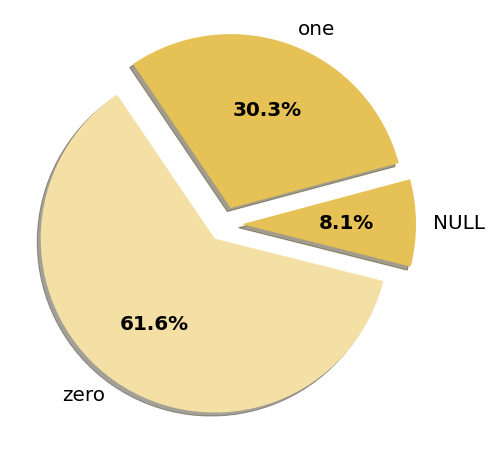

In [159]:
fig,axs=plt.subplots(figsize=(8,8))
one=train_f[train_f['doctor_recc_seasonal']==1]
one=one['doctor_recc_seasonal'].count()

zero=train[train['doctor_recc_seasonal']==0]
zero=zero['doctor_recc_seasonal'].count()

none=train_final[train_final['doctor_recc_seasonal']=='Non Response']
none=none['doctor_recc_seasonal'].count()
##
ratio=[one,zero,none]
labels=['one','zero','NULL']
patches,texts,pcts=plt.pie(x=ratio,labels=labels,autopct='%.1f%%',shadow=True,startangle=15,colors=(['#e6c155','#f4e0a5','#e6c155']), explode=([0.1,0.1,0.1]),textprops={'fontsize': 20})
plt.setp(pcts,color='black',fontweight='bold')

[None, None, None, None, None, None]

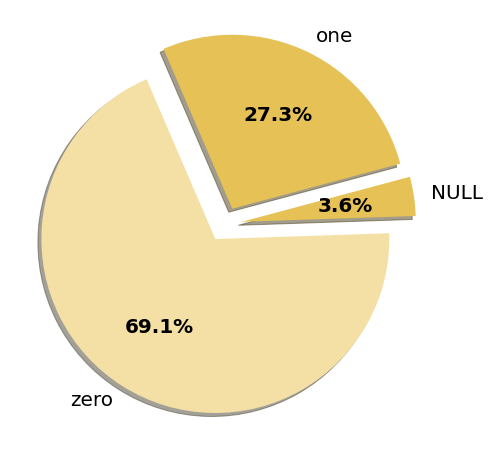

In [161]:
fig,axs=plt.subplots(figsize=(8,8))
one=train_f[train_f['chronic_med_condition']==1]
one=one['chronic_med_condition'].count()

zero=train_f[train_f['chronic_med_condition']==0]
zero=zero['chronic_med_condition'].count()

none=train_final[train_final['chronic_med_condition']=='Non Response']
none=none['chronic_med_condition'].count()
##
ratio=[one,zero,none]
labels=['one','zero','NULL']
patches,texts,pcts=plt.pie(x=ratio,labels=labels,autopct='%.1f%%',shadow=True,startangle=15,colors=(['#e6c155','#f4e0a5','#e6c155']), explode=([0.1,0.1,0.1]),textprops={'fontsize': 20})
plt.setp(pcts,color='black',fontweight='bold')

[None, None, None, None, None, None]

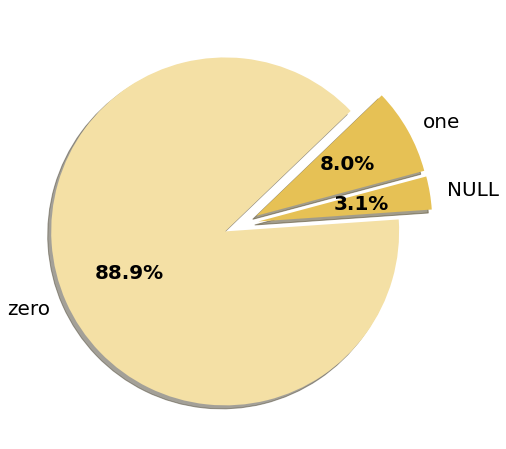

In [162]:
fig,axs=plt.subplots(figsize=(8,8))
one=train_f[train_f['child_under_6_months']==1]
one=one['child_under_6_months'].count()

zero=train_f[train_f['child_under_6_months']==0]
zero=zero['child_under_6_months'].count()

none=train_final[train_final['child_under_6_months']=='Non Response']
none=none['child_under_6_months'].count()
##
ratio=[one,zero,none]
labels=['one','zero','NULL']
patches,texts,pcts=plt.pie(x=ratio,labels=labels,autopct='%.1f%%',shadow=True,startangle=15,colors=(['#e6c155','#f4e0a5','#e6c155']), explode=([0.1,0.1,0.1]),textprops={'fontsize': 20})
plt.setp(pcts,color='black',fontweight='bold')

[None, None, None, None, None, None]

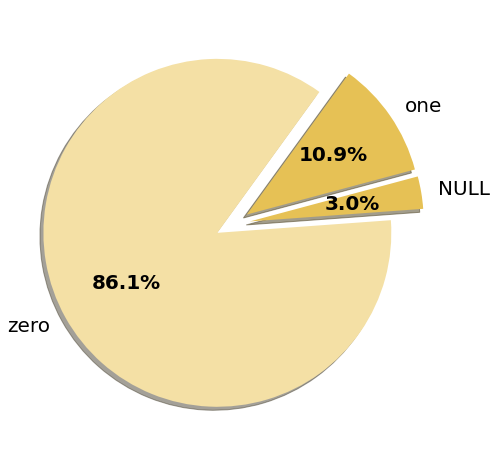

In [163]:
fig,axs=plt.subplots(figsize=(8,8))
one=train_f[train_f['health_worker']==1]
one=one['health_worker'].count()

zero=train_f[train_f['health_worker']==0]
zero=zero['health_worker'].count()

none=train_final[train_final['health_worker']=='Non Response']
none=none['health_worker'].count()
##
ratio=[one,zero,none]
labels=['one','zero','NULL']
patches,texts,pcts=plt.pie(x=ratio,labels=labels,autopct='%.1f%%',shadow=True,startangle=15,colors=(['#e6c155','#f4e0a5','#e6c155']), explode=([0.1,0.1,0.1]),textprops={'fontsize': 20})
plt.setp(pcts,color='black',fontweight='bold')

[None, None, None, None, None, None]

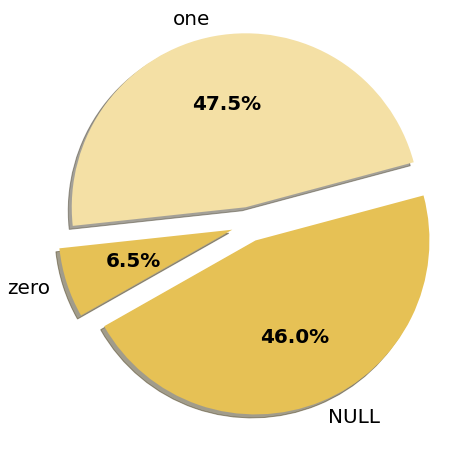

In [165]:
fig,axs=plt.subplots(figsize=(8,8))
one=train_f[train_f['health_insurance']==1]
one=one['health_insurance'].count()

zero=train_f[train_f['health_insurance']==0]
zero=zero['health_insurance'].count()

none=train_final[train_final['health_insurance']=='Non Response']
none=none['health_insurance'].count()
##
ratio=[one,zero,none]
labels=['one','zero','NULL']
patches,texts,pcts=plt.pie(x=ratio,labels=labels,autopct='%.1f%%',shadow=True,startangle=15,colors=(['#f4e0a5','#e6c155','#e6c155']), explode=([0.1,0.1,0.1]),textprops={'fontsize': 20})
plt.setp(pcts,color='black',fontweight='bold')

[None, None, None, None, None, None]

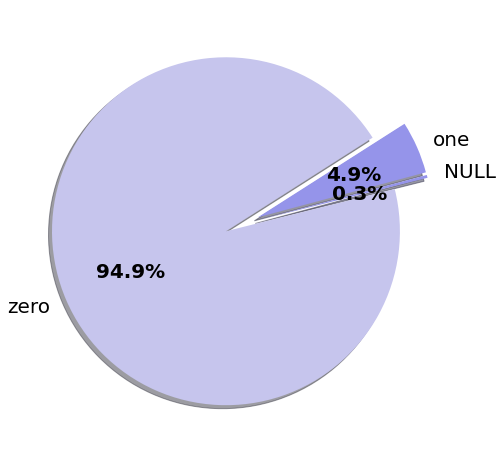

In [174]:
fig,axs=plt.subplots(figsize=(8,8))
one=train_f[train_f['behavioral_antiviral_meds']==1]
one=one['behavioral_antiviral_meds'].count()

zero=train_f[train_f['behavioral_antiviral_meds']==0]
zero=zero['behavioral_antiviral_meds'].count()

none=train_final[train_final['behavioral_antiviral_meds']=='Non Response']
none=none['behavioral_antiviral_meds'].count()
##
ratio=[one,zero,none]
labels=['one','zero','NULL']
patches,texts,pcts=plt.pie(x=ratio,labels=labels,autopct='%.1f%%',shadow=True,startangle=15,colors=(['#9594ea','#c6c5ed','#9594ea']), explode=([0.1,0.1,0.1]),textprops={'fontsize': 20})
plt.setp(pcts,color='black',fontweight='bold')

[None, None, None, None, None, None]

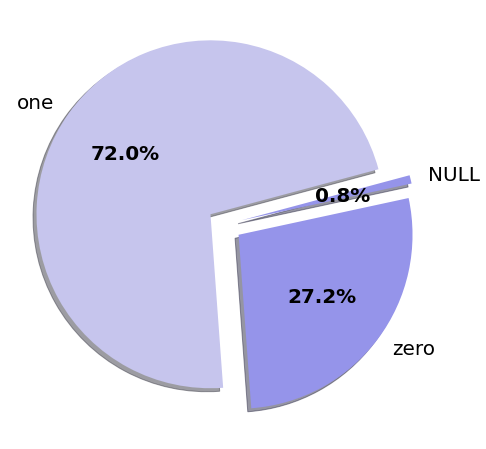

In [176]:
fig,axs=plt.subplots(figsize=(8,8))
one=train_f[train_f['behavioral_avoidance']==1]
one=one['behavioral_avoidance'].count()

zero=train_f[train_f['behavioral_avoidance']==0]
zero=zero['behavioral_avoidance'].count()

none=train_final[train_final['behavioral_avoidance']=='Non Response']
none=none['behavioral_avoidance'].count()
##
ratio=[one,zero,none]
labels=['one','zero','NULL']
patches,texts,pcts=plt.pie(x=ratio,labels=labels,autopct='%.1f%%',shadow=True,startangle=15,colors=(['#c6c5ed','#9594ea','#9594ea']), explode=([0.1,0.1,0.1]),textprops={'fontsize': 20})
plt.setp(pcts,color='black',fontweight='bold')

[None, None, None, None, None, None]

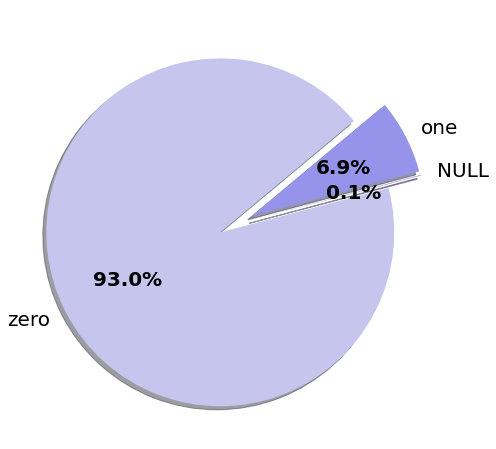

In [178]:
fig,axs=plt.subplots(figsize=(8,8))
one=train_f[train_f['behavioral_face_mask']==1]
one=one['behavioral_face_mask'].count()

zero=train_f[train_f['behavioral_face_mask']==0]
zero=zero['behavioral_face_mask'].count()

none=train_final[train_final['behavioral_face_mask']=='Non Response']
none=none['behavioral_face_mask'].count()
##
ratio=[one,zero,none]
labels=['one','zero','NULL']
patches,texts,pcts=plt.pie(x=ratio,labels=labels,autopct='%.1f%%',shadow=True,startangle=15,colors=(['#9594ea','#c6c5ed','#9594ea']), explode=([0.1,0.1,0.1]),textprops={'fontsize': 20})
plt.setp(pcts,color='black',fontweight='bold')

[None, None, None, None, None, None]

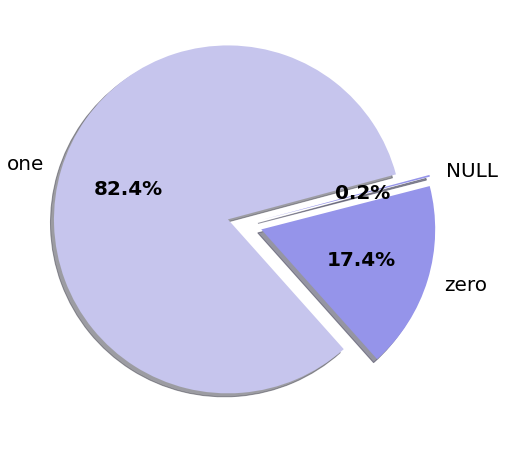

In [180]:
fig,axs=plt.subplots(figsize=(8,8))
one=train_f[train_f['behavioral_wash_hands']==1]
one=one['behavioral_wash_hands'].count()

zero=train_f[train_f['behavioral_wash_hands']==0]
zero=zero['behavioral_wash_hands'].count()

none=train_final[train_final['behavioral_wash_hands']=='Non Response']
none=none['behavioral_wash_hands'].count()
##
ratio=[one,zero,none]
labels=['one','zero','NULL']
patches,texts,pcts=plt.pie(x=ratio,labels=labels,autopct='%.1f%%',shadow=True,startangle=15,colors=(['#c6c5ed','#9594ea','#9594ea']), explode=([0.1,0.1,0.1]),textprops={'fontsize': 20})
plt.setp(pcts,color='black',fontweight='bold')

[None, None, None, None, None, None]

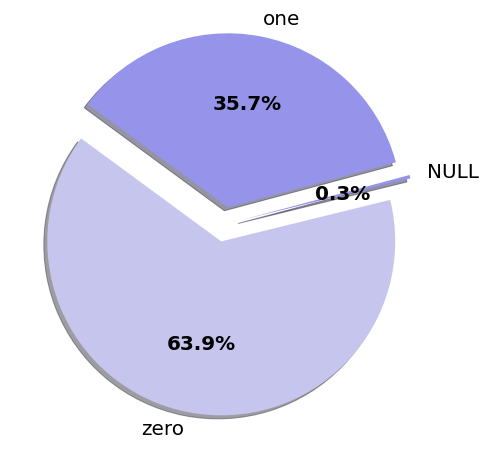

In [182]:
fig,axs=plt.subplots(figsize=(8,8))
one=train_f[train_f['behavioral_large_gatherings']==1]
one=one['behavioral_large_gatherings'].count()

zero=train_f[train_f['behavioral_large_gatherings']==0]
zero=zero['behavioral_large_gatherings'].count()

none=train_final[train_final['behavioral_large_gatherings']=='Non Response']
none=none['behavioral_large_gatherings'].count()
##
ratio=[one,zero,none]
labels=['one','zero','NULL']
patches,texts,pcts=plt.pie(x=ratio,labels=labels,autopct='%.1f%%',shadow=True,startangle=15,colors=(['#9594ea','#c6c5ed','#9594ea']), explode=([0.1,0.1,0.1]),textprops={'fontsize': 20})
plt.setp(pcts,color='black',fontweight='bold')

[None, None, None, None, None, None]

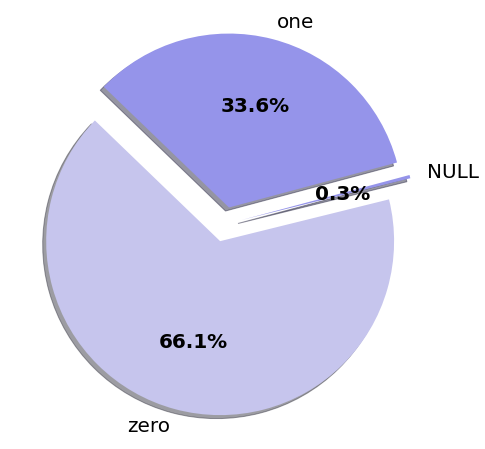

In [183]:
fig,axs=plt.subplots(figsize=(8,8))
one=train_f[train_f['behavioral_outside_home']==1]
one=one['behavioral_outside_home'].count()

zero=train_f[train_f['behavioral_outside_home']==0]
zero=zero['behavioral_outside_home'].count()

none=train_final[train_final['behavioral_outside_home']=='Non Response']
none=none['behavioral_outside_home'].count()
##
ratio=[one,zero,none]
labels=['one','zero','NULL']
patches,texts,pcts=plt.pie(x=ratio,labels=labels,autopct='%.1f%%',shadow=True,startangle=15,colors=(['#9594ea','#c6c5ed','#9594ea']), explode=([0.1,0.1,0.1]),textprops={'fontsize': 20})
plt.setp(pcts,color='black',fontweight='bold')

[None, None, None, None, None, None]

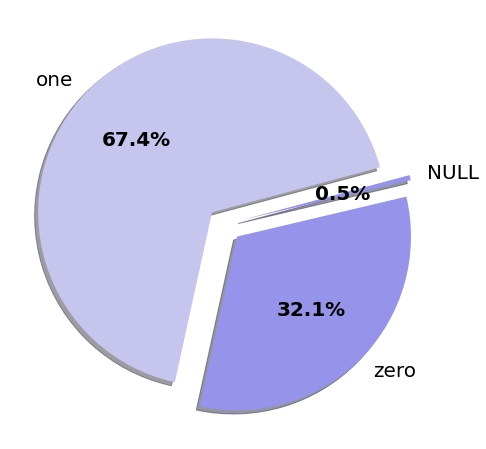

In [185]:
fig,axs=plt.subplots(figsize=(8,8))
one=train_f[train_f['behavioral_touch_face']==1]
one=one['behavioral_touch_face'].count()

zero=train_f[train_f['behavioral_touch_face']==0]
zero=zero['behavioral_touch_face'].count()

none=train_final[train_final['behavioral_touch_face']=='Non Response']
none=none['behavioral_touch_face'].count()
##
ratio=[one,zero,none]
labels=['one','zero','NULL']
patches,texts,pcts=plt.pie(x=ratio,labels=labels,autopct='%.1f%%',shadow=True,startangle=15,colors=(['#c6c5ed','#9594ea','#9594ea']), explode=([0.1,0.1,0.1]),textprops={'fontsize': 20})
plt.setp(pcts,color='black',fontweight='bold')

[None, None, None, None, None, None, None, None, None, None]

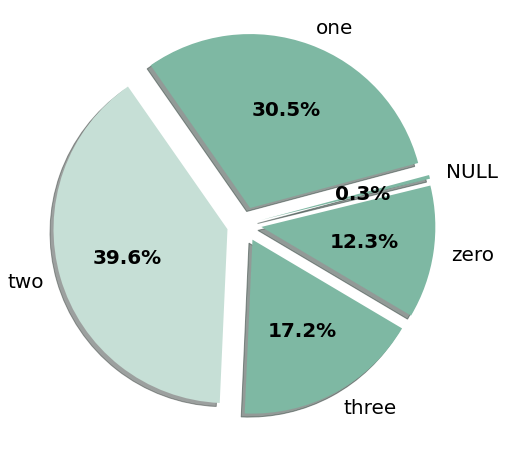

In [188]:
fig,axs=plt.subplots(figsize=(8,8))
one=train[train['h1n1_concern']==1]
one=one['h1n1_concern'].count()

two=train[train['h1n1_concern']==2]
two=two['h1n1_concern'].count()

three=train[train['h1n1_concern']==3]
three=three['h1n1_concern'].count()

zero=train[train['h1n1_concern']==0]
zero=zero['h1n1_concern'].count()

none=train_final[train_final['h1n1_concern']=='Non Response']
none=none['h1n1_concern'].count()
##
ratio=[one,two,three,zero,none]
labels=['one','two','three','zero','NULL']
patches,texts,pcts=plt.pie(x=ratio,labels=labels,autopct='%.1f%%',shadow=True,startangle=15,colors=(['#7eb8a3','#c6dfd6','#7eb8a3','#7eb8a3','#7eb8a3']), explode=([0.1,0.1,0.1,0.1,0.1]),textprops={'fontsize': 20})
plt.setp(pcts,color='black',fontweight='bold')

[None, None, None, None, None, None, None, None]

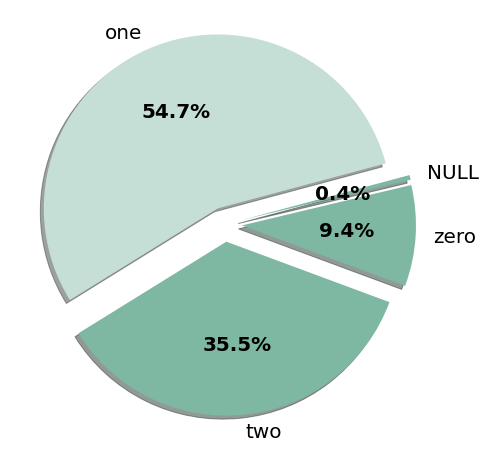

In [191]:
fig,axs=plt.subplots(figsize=(8,8))
one=train[train['h1n1_knowledge']==1]
one=one['h1n1_knowledge'].count()

two=train[train['h1n1_knowledge']==2]
two=two['h1n1_knowledge'].count()

zero=train[train['h1n1_knowledge']==0]
zero=zero['h1n1_knowledge'].count()

none=train_final[train_final['h1n1_knowledge']=='Non Response']
none=none['h1n1_knowledge'].count()
##
ratio=[one,two,zero,none]
labels=['one','two','zero','NULL']
patches,texts,pcts=plt.pie(x=ratio,labels=labels,autopct='%.1f%%',shadow=True,startangle=15,colors=(['#c6dfd6','#7eb8a3','#7eb8a3','#7eb8a3']), explode=([0.1,0.1,0.1,0.1]),textprops={'fontsize': 20})
plt.setp(pcts,color='black',fontweight='bold')